In [1]:
# import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import pickle
import random

from pprint import pprint

In [2]:
data_path = os.getcwd() + '/Pickle/'

In [3]:
rels = pd.read_pickle(data_path + 'all_rels.pkl')  # read relationships
rels.head()

,category_id,description2,id,description,entity1_id,is_current,updated_at,entity2_id,currency,start_date,amount,goods,description1,end_date,filings
1,1,Director,1,Allen I Questrom had a position (Director) at...,1006,False,2011-03-13T20:15:59Z,1,None,2007-00-00,NaN,None,Director,2010-06-00,NaN
2,1,Director,2,Linda S Wolf has a position (Director) at Wa...,1007,True,2008-11-05T17:05:10Z,1,None,2005-00-00,NaN,None,Director,None,NaN
3,1,Director,3,Aida M Alvarez had a position (Director) at ...,1008,False,2018-04-23T14:25:16Z,1,None,None,NaN,None,Director,2015-00-00,NaN
4,1,Chairman,4,Gregory Boyd Penner has/had a position (Vice ...,1009,None,2018-04-23T14:54:35Z,1,None,None,NaN,None,Vice Chairman,None,NaN
6,1,Director,6,Christopher J Williams had a position (Direct...,1011,False,2015-03-31T14:56:50Z,1,None,2004-00-00,NaN,None,Director,None,NaN


In [4]:
rels.shape

(1230815, 15)

category_id possible values:
1. Position
2. Education
3. Membership
4. Family
5. Donation
6. Transaction
7. Lobbying
8. Social
9. Professional
10. Ownership
11. Hierarchy
12. Generic

In [5]:
ents = pd.read_pickle(data_path + 'all_entities.pkl')  # read entities
ents.head()  # index corresponds to entity ID

,summary,parent_id,extensions,website,name,primary_ext,aliases,blurb,types,updated_at,id,start_date,end_date
1,None,NaN,"{'Org': {'name_nick': 'WAL-MART', 'name': 'Wal...",www.corporate.walmart.com,Walmart,Org,"[IRS EIN 71-0415188, Wal Mart, Wal-Mart, Wal-M...",Retail merchandising,"[Organization, Business, Public Company]",2020-06-30T20:47:43Z,1,None,None
2,None,NaN,"{'Org': {'name_nick': 'EXXONMOBIL', 'name': 'E...",http://www.exxonmobil.com,ExxonMobil,Org,"[Exxon Corporation, Exxon Mobil, Exxon Mobil C...","Oil and gas exploration, production, and marke...","[Organization, Business, Public Company]",2020-07-14T02:29:21Z,2,1882-00-00,None
3,None,NaN,"{'Org': {'name_nick': 'CHEVRON', 'name': 'Chev...",www.chevron.com,Chevron,Org,"[Chevron, Chevron Corporation, ChevronTexaco, ...",Energy Company,"[Organization, Business, Public Company]",2020-07-14T02:27:36Z,3,None,None
4,None,NaN,"{'Org': {'name_nick': 'GEN-MOTOR', 'name': 'Ge...",www.gm.com,General Motors Company,Org,"[General Motors, General Motors Company, Gener...",automobile manufacturer,"[Organization, Business, Public Company]",2020-06-16T01:28:05Z,4,1908-00-00,2011-03-31
5,None,NaN,"{'Org': {'name_nick': 'CONOCOPHIL', 'name': 'C...",http://www.conocophillips.com/,ConocoPhillips,Org,"[Conoco Inc., ConocoPhillips, ConocoPhillips H...",Texas-based oil and gas corporation,"[Organization, Business, Public Company]",2020-06-11T14:26:07Z,5,None,None


In [6]:
ents.shape

(284500, 13)

In [7]:
# ents.loc['186417', :]

In [8]:
# ents[ents['primary_ext'] == 'Couple']

In [9]:
# types = ents.explode('types')['types'].unique()

All values for entity types:

'Academic',
'Academic Research Institute',
'Business',
'Business Person',
'Consulting Firm',
'Couple',
'Cultural/Arts',
'Elected Representative',
'Elite Consensus Group',
'Government Advisory Body',
'Government Body',
'Government-Sponsored Enterprise',
'Individual Campaign Committee',
'Industry/Trade Association',
'Labor Union',
'Law Firm',
'Lawyer',
'Lobbying Firm',
'Lobbyist',
'Media Organization',
'Media Personality',
'Membership Organization',
'Organization',
'Other Campaign Committee',
'Other Not-for-Profit',
'PAC',
'Person',
'Philanthropy',
'Policy/Think Tank',
'Political Candidate',
'Political Fundraising Committee',
'Political Party',
'Private Company',
'Professional Association',
'Public Company',
'Public Intellectual',
'Public Official',
'Public Relations Firm',
'School',
'Social Club'

In [10]:
def eda():
    print('Primary type breakdown for entities:')
    print(ents['primary_ext'].value_counts())
    print('-' * 15)
    
    print('Specific type breakdown for entities:')
    eda_df = ents.explode('types')
    print(eda_df['types'].value_counts())
    print('-' * 15)
    
    cats = pd.Series(['Position', 'Education', 'Membership', 'Family', 'Donation', 'Transaction', 'Lobbying', 'Social', 'Professional', 'Ownership', 'Hierarchy', 'Generic'], index = range(1, 13))
    eda_df = pd.concat([rels['category_id'].value_counts(), cats], axis = 1)
    eda_df = eda_df.rename(columns = {'category_id': 'count', 0: 'category'})
    eda_df = eda_df.sort_values(by = 'count', ascending = False)
    print('Relationship category breakdown:')
    print(eda_df)
# #     plt.barh(eda_df['category'], (eda_df['count'] / rels.shape[0]) * 100, color = '#9433ff')
#     plt.barh(eda_df['category'], eda_df['count'] / 1000, color = '#9433ff')
#     plt.title('Breakdown of Relationships')
#     plt.xlabel('Number of Relationships (x1000s)')
#     plt.show()
#     plt.close()
    print('-' * 15)

In [11]:
eda()

Primary type breakdown for entities:
Person    205548
Org        78526
Couple       426
Name: primary_ext, dtype: int64
---------------
Specific type breakdown for entities:
Person                             205548
Organization                        78526
Business Person                     62995
Business                            25436
Political Fundraising Committee     14070
Lobbyist                            11941
Academic                             8892
Political Candidate                  8376
Lawyer                               7973
Public Official                      7211
Private Company                      5862
Elected Representative               4468
Government Body                      3598
Other Not-for-Profit                 3335
School                               3243
Media Personality                    3021
Public Company                       2742
Individual Campaign Committee        2082
Philanthropy                         1805
Other Campaign Committee    

In [12]:
def filterByType(df):  # returns indices of rows that satisfy the filter by 'type' criterion
    reqd_types = ['Philanthropy', 'Other Not-for-Profit', 'Academic Research Institute', 'School', 'Cultural/Arts', 'Policy/Think Tank']  # 'Academic' has been removed
    
    df_exploded = df.explode('types')
    
    return df_exploded[df_exploded['types'].isin(reqd_types)].index

In [13]:
index_to_keep = filterByType(ents)
filtered_ents = ents.loc[index_to_keep]
filtered_ents  # base set of entities

,summary,parent_id,extensions,website,name,primary_ext,aliases,blurb,types,updated_at,id,start_date,end_date
14713,None,14730.0,"{'Org': {'name_nick': None, 'name': 'Harvard L...",http://www.law.harvard.edu,Harvard Law School,Org,"[Harvard Law School, Harvard University Law Sc...",None,"[Organization, School]",2020-07-12T23:23:57Z,14713,None,None
14730,None,NaN,"{'Org': {'name_nick': None, 'name': 'Harvard U...",http://www.harvard.edu,Harvard University,Org,"[Harvard College, Harvard Corporation, Harvard...","Elite private university located in Cambridge, MA","[Organization, School]",2020-07-12T23:50:00Z,14730,1636-00-00,None
14922,None,NaN,"{'Org': {'name_nick': None, 'name': 'Universit...",None,University of Nebraska Lincoln,Org,"[University of Nebraska - Lincoln, University ...",None,"[Organization, School]",2019-12-13T19:33:21Z,14922,None,None
14924,Columbia University was founded in 1754 as Kin...,NaN,"{'Org': {'name_nick': None, 'name': 'Columbia ...",http://www.columbia.edu/index.html,Columbia University,Org,"[Columbia University, Columbia University in t...",Oldest institution of higher learning in the s...,"[Organization, School]",2020-07-10T18:37:07Z,14924,1754-00-00,None
14925,None,NaN,"{'Org': {'name_nick': None, 'name': 'Universit...",http://www.uillinois.edu/,University of Illinois,Org,"[University of Illinois, University of Illinoi...",One of the original 37 public land-grant insti...,"[Organization, School]",2020-05-04T14:54:31Z,14925,1867-00-00,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
380599,None,NaN,"{'Org': {'name_nick': None, 'name': 'Passaic C...",None,Passaic Community College,Org,[Passaic Community College],a New Jersey community college,"[Organization, School]",2020-07-14T11:59:35Z,380599,None,None
380600,None,NaN,"{'Org': {'name_nick': None, 'name': 'Friends S...",None,Friends Select School,Org,[Friends Select School],a Philadelphia private school,"[Organization, School]",2020-07-14T12:10:05Z,380600,None,None
380699,None,NaN,"{'Org': {'name_nick': None, 'name': 'Living Be...",None,Living Beyond Breast Cancer,Org,[Living Beyond Breast Cancer],provides support to those impacted by breast c...,"[Organization, Other Not-for-Profit]",2020-07-14T20:21:48Z,380699,None,None
380714,None,NaN,"{'Org': {'name_nick': None, 'name': 'Juvenile ...",None,Juvenile Law Center,Org,[Juvenile Law Center],"Juvenile Law Center, founded in 1975, is the f...","[Organization, Other Not-for-Profit]",2020-07-15T01:01:25Z,380714,None,None


In [14]:
# filtered_ents.loc['14713', 'aliases']

In [15]:
base_entities = pd.Series(pd.to_numeric(filtered_ents.index))
base_entities  # index values for base set of entities

0        14713
1        14730
2        14922
3        14924
4        14925
         ...  
9101    380599
9102    380600
9103    380699
9104    380714
9105    380828
Length: 9106, dtype: int64

In [16]:
base_rels = rels[rels['entity1_id'].isin(base_entities) | rels['entity2_id'].isin(base_entities)]  # get relationships of base entities
base_rels.shape

(97420, 15)

base_rels contains relationships of entites that are of the following type: 

* 'Philanthropy'
* 'Other Not-for-Profit'
* 'Academic Research Institute'
* 'School'
* 'Cultural/Arts'
* 'Policy/Think Tank'

In [17]:
base_rels.loc['26197', :]  # gives us relationship with ID 26197

category_id                                                     2
description2                                                 None
id                                                          26197
description     Roel C Campos  is/was a student of  Harvard La...
entity1_id                                                  14659
is_current                                                   None
updated_at                                   2008-11-07T14:43:40Z
entity2_id                                                  14713
currency                                                     None
start_date                                                   None
amount                                                        NaN
goods                                                        None
description1                                                 None
end_date                                               1979-00-00
filings                                                       NaN
Name: 2619

In [18]:
ents.loc[str(base_rels.loc['26197', 'entity1_id'])]  # corresponding entity1 ID from relationship 26197 

summary                                                     None
parent_id                                                    NaN
extensions     {'Person': {'name_nick': None, 'nationality': ...
website                                                     None
name                                               Roel C Campos
primary_ext                                               Person
aliases                                          [Roel C Campos]
blurb                Former SEC Commissioner under George W Bush
types                                  [Person, Business Person]
updated_at                                  2014-10-10T21:36:09Z
id                                                         14659
start_date                                                  None
end_date                                                    None
Name: 14659, dtype: object

In [19]:
ents.loc[str(base_rels.loc['26197', 'entity2_id'])]  # corresponding entity2 ID from relationship 26197 

summary                                                     None
parent_id                                                  14730
extensions     {'Org': {'name_nick': None, 'name': 'Harvard L...
website                               http://www.law.harvard.edu
name                                          Harvard Law School
primary_ext                                                  Org
aliases        [Harvard Law School, Harvard University Law Sc...
blurb                                                       None
types                                     [Organization, School]
updated_at                                  2020-07-12T23:23:57Z
id                                                         14713
start_date                                                  None
end_date                                                    None
Name: 14713, dtype: object

Breakdown of base_rels by category:

In [20]:
cats = pd.Series(['Position', 'Education', 'Membership', 'Family', 'Donation', 'Transaction', 'Lobbying', 'Social', 'Professional', 'Ownership', 'Hierarchy', 'Generic'], index = range(1, 13))
base_rels_breakdown = pd.concat([base_rels['category_id'].value_counts(), cats], axis = 1).dropna().rename(columns = {'category_id': 'count', 0: 'category'}).sort_values(by = 'count', ascending = False)
base_rels_breakdown

,count,category
1,45290.0,Position
2,27124.0,Education
5,12210.0,Donation
3,5135.0,Membership
12,3492.0,Generic
11,1951.0,Hierarchy
6,1719.0,Transaction
10,477.0,Ownership
7,22.0,Lobbying


Overview of descriptions for different types of relations:

In [21]:
def baseRelsTypeExplore(cat_id):
    for i in base_rels[base_rels['category_id'] == cat_id].sample(n = 10)['description']:
#     for i in rels[rels['category_id'] == cat_id].sample(n = 1)['description']:
        print(i)

In [22]:
print('Transaction:')
baseRelsTypeExplore(6)
print('-' * 15)
print('Lobbying:')
baseRelsTypeExplore(7)
print('-' * 15)
print('Hierarchy:')
baseRelsTypeExplore(11)
print('-' * 15)
print('Generic:')
baseRelsTypeExplore(12)
print('-' * 15)
# for i in range(1, 13):
#     print(i)
#     baseRelsTypeExplore(i)
#     print('-' * 15)

Transaction:
Razzal Hospitality and Management  and  LCG Community Services  did/do business
Dartmouth College  and  Lone Pine Capital  did/do business
PacificSource Health Inc  and  David H. Koshgarian  do business
School District of Philadelphia  and  ER Strategies  did/do business
Neil Brown  and  Atlantic Council  did business
Texas A&M University  and  Wells Fargo & Company  did/do business
Stetson University  and  FIA Card Services, N.A.  did/do business
Altarum Institute  and  Michigan Technological University  did/do business
Intelligence & Security Academy, LLC  and  US Department of State  did business
Prospector Partners  and  Swarthmore College  did/do business
---------------
Lobbying:
Ven. Maligavila Assaji thero  lobbies  Sri Ghnanobhasa Meditation Center 
Debating Matters  lobbies/lobbied  Sense about Science 
McKenna Long & Aldridge LLP  lobbies/lobbied  American College Health Association 
Daniel Hannan  lobbies  Heritage Foundation 
Equality Loudoun  lobbies  Loudoun

Network for base_rels:

In [23]:
# G_base = nx.from_pandas_edgelist(base_rels, 'entity1_id', 'entity2_id', ['category_id', 'description', 'updated_at'])
G_base = nx.from_pandas_edgelist(base_rels, 'entity1_id', 'entity2_id', ['category_id', 'description', 'updated_at'], create_using = nx.MultiGraph())  # graph of base set of relationships, multigraph allows for multiple edges between entities

In [24]:
G_base.number_of_nodes()

65248

In [25]:
G_base.number_of_edges()

97420

In [26]:
pprint(dict(G_base[14659]))

{14713: AtlasView({0: {'category_id': 2, 'description': 'Roel C Campos  is/was a student of  Harvard Law School ', 'updated_at': '2008-11-07T14:43:40Z'}}),
 35353: AtlasView({0: {'category_id': 1, 'description': 'Roel C Campos  has a position (Board Member) at  New America Alliance ', 'updated_at': '2014-10-10T21:36:09Z'}}),
 45367: AtlasView({0: {'category_id': 3, 'description': 'Roel C Campos  is a member of  Committee on Capital Markets Regulation ', 'updated_at': '2009-11-18T16:35:33Z'}})}


Number of connections for each entity in the graph:

In [27]:
G_base.degree()[14659]  # key is an entity ID

3

Enitity with max connections:

In [28]:
g_base_degree = dict(G_base.degree())
max_base_deg_key = max(g_base_degree, key = g_base_degree.get)
print(max_base_deg_key, G_base.degree()[max_base_deg_key])

66860 1174


In [29]:
ents.loc[str(max_base_deg_key)]

summary                                                     None
parent_id                                                    NaN
extensions     {'Org': {'name_nick': None, 'name': 'Walton Fa...
website                                                     None
name                                Walton Family Foundation Inc
primary_ext                                                  Org
aliases                           [Walton Family Foundation Inc]
blurb          Philanthropic foundation affiliated with famil...
types                               [Organization, Philanthropy]
updated_at                                  2020-06-08T21:54:09Z
id                                                         66860
start_date                                                  None
end_date                                                    None
Name: 66860, dtype: object

Mean and median of node degree:

In [30]:
base_degree_values = np.array(list(dict(G_base.degree()).values()))
print('Mean degree:', np.mean(base_degree_values))
print('Median degree:', np.median(base_degree_values))

Mean degree: 2.9861451692005887
Median degree: 1.0


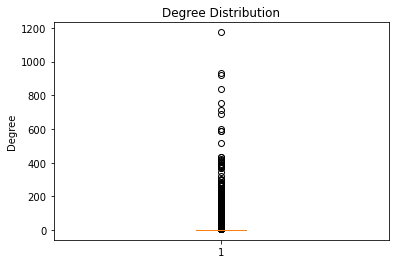

In [31]:
plt.boxplot(base_degree_values)
plt.title('Degree Distribution')
# plt.xticks([1], ['Relationships'])
plt.ylabel('Degree')
# plt.savefig(os.getcwd() + '/Graphs/relationshipGraphs/degreeBoxplot')
plt.show()
plt.close()

Degree distribution:

In [32]:
base_degrees = pd.Series(base_degree_values).value_counts().sort_index()  # first col is degree, count is second col sorted by degree (ascending)
base_degrees

1       43881
2       10399
3        4156
4        1897
5        1048
        ...  
756         1
840         1
920         1
931         1
1174        1
Length: 214, dtype: int64

Degree distro confirms what the median degree tells us: most node have degree = 1.

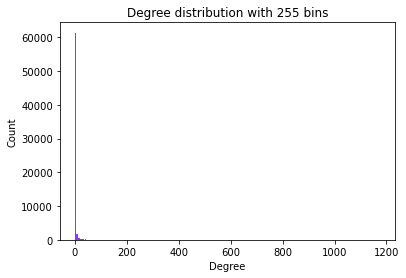

In [33]:
n_bins = int(np.around(np.sqrt(len(base_degree_values))))
plt.hist(base_degree_values, bins = n_bins, color = '#9433ff')
plt.title('Degree distribution with {} bins'.format(str(n_bins)))
plt.xlabel('Degree')
plt.ylabel('Count')
# plt.savefig(os.getcwd() + '/Graphs/relationshipGraphs/degreeDistro')
plt.show()
plt.close()

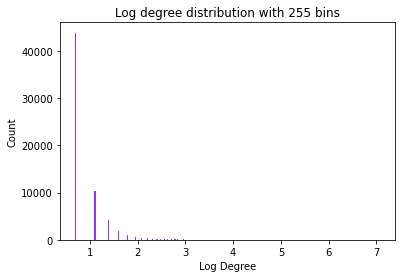

In [34]:
plt.hist(np.log(base_degree_values + 1), bins = n_bins, color = '#9433ff')  # added 1 for smoothing
plt.title('Log degree distribution with {} bins'.format(str(n_bins)))
plt.xlabel('Log Degree')
plt.ylabel('Count')
# plt.savefig(os.getcwd() + '/Graphs/relationshipGraphs/degreeDistroLog')
plt.show()
plt.close()

Equivalent plot as a log-log line graph:

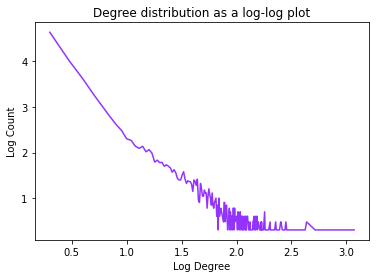

In [35]:
plt.plot(np.log10(base_degrees.index + 1), np.log10(base_degrees.values + 1), color = '#9433ff')  # added 1 for smoothing
plt.title('Degree distribution as a log-log plot')
# tick_locs = plt.xticks()[0]
# plt.xticks(tick_locs, ['0' , '$10^{0.5}$', '$10^1$', '$10^{1.5}$', '$10^2$', '$10^{2.5}$', '$10^3$'])
plt.xlabel('Log Degree')
# plt.yticks(range(1, 5), ['$10^1$', '$10^2$', '$10^3$', '$10^4$'])
plt.ylabel('Log Count')
# plt.savefig(os.getcwd() + '/Graphs/relationshipGraphs/degreeDistroLogLogTicks')
plt.show()
plt.close()

Degree distro per relationship type:

In [36]:
def degreeDistroByType(cat_id, label):
    filtered_rels = base_rels[base_rels['category_id'] == cat_id]
#     print(filtered_rels.shape)
    
    # create the graph from the filtered df
    G_filtered = nx.from_pandas_edgelist(filtered_rels, 'entity1_id', 'entity2_id', ['category_id', 'description', 'updated_at'], create_using = nx.MultiGraph())
    print('Nodes:', G_filtered.number_of_nodes())
    print('Edges', G_filtered.number_of_edges())
    
    # get ent with max connections
    g_filtered_degree = dict(G_filtered.degree())
    max_filtered_deg_key = max(g_filtered_degree, key = g_filtered_degree.get)
    print('Entiity with most edges:', ents.loc[str(max_filtered_deg_key), 'name'])
    print('Number of edges:', G_filtered.degree()[max_filtered_deg_key])
    print('Entity type:', ents.loc[str(max_filtered_deg_key), 'types'])
    
    # get mean and median degree
    filtered_degree_values = np.array(list(dict(G_filtered.degree()).values()))
    print('Mean degree:', np.mean(filtered_degree_values))
    print('Median degree:', np.median(filtered_degree_values))
    
    filtered_degrees = pd.Series(filtered_degree_values).value_counts().sort_index()  # first col is degree, count is second col sorted by degree (ascending)

#     # degree distro graph
#     plt.plot(np.log10(filtered_degrees.index + 1), np.log10(filtered_degrees.values + 1), color = '#9433ff')  # added 1 for smoothing
#     plt.title(label + ' degree distribution as a log-log plot')
# #     tick_locs = plt.xticks()[0]
# #     plt.xticks(tick_locs, ['0' , '$10^{0.5}$', '$10^1$', '$10^{1.5}$', '$10^2$', '$10^{2.5}$', '$10^3$'])
#     plt.xlabel('Log Degree')
# #     plt.yticks(range(1, 5), ['$10^1$', '$10^2$', '$10^3$', '$10^4$'])
#     plt.ylabel('Log Count')
#     # plt.savefig(os.getcwd() + '/Graphs/relationshipGraphs/degreeDistroLogLogTicks')
#     plt.show()
#     plt.close()
    return np.log10(filtered_degrees.index + 1), np.log10(filtered_degrees.values + 1)

In [37]:
degree_index_dict = {}
degree_values_dict = {} 

for i in base_rels_breakdown.index:
    print('Category:', base_rels_breakdown.loc[i, 'category'])
    degree_index_dict[base_rels_breakdown.loc[i, 'category']], degree_values_dict[base_rels_breakdown.loc[i, 'category']] = degreeDistroByType(i, base_rels_breakdown.loc[i, 'category'])
    print('-' * 15)

Category: Position
Nodes: 40340
Edges 45290
Entiity with most edges: Heartland Institute
Number of edges: 753
Entity type: ['Organization', 'Other Not-for-Profit', 'Policy/Think Tank']
Mean degree: 2.245413981160139
Median degree: 1.0
---------------
Category: Education
Nodes: 20752
Edges 27124
Entiity with most edges: Harvard Business School
Number of edges: 834
Entity type: ['Organization', 'School']
Mean degree: 2.6141094834232845
Median degree: 1.0
---------------
Category: Donation
Nodes: 7233
Edges 12210
Entiity with most edges: Walton Family Foundation Inc
Number of edges: 1160
Entity type: ['Organization', 'Philanthropy']
Mean degree: 3.376192451265035
Median degree: 1.0
---------------
Category: Membership
Nodes: 4728
Edges 5135
Entiity with most edges: Council on Foreign Relations
Number of edges: 442
Entity type: ['Organization', 'Membership Organization', 'Other Not-for-Profit', 'Policy/Think Tank']
Mean degree: 2.172165820642978
Median degree: 1.0
---------------
Category:

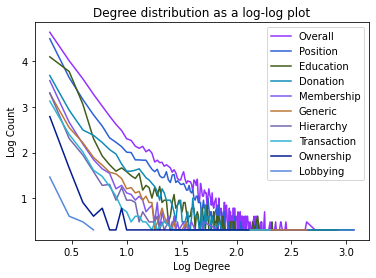

In [38]:
plt.plot(np.log10(base_degrees.index + 1), np.log10(base_degrees.values + 1), color = '#9433ff', label = 'Overall')  # added 1 for smoothing

for i in degree_values_dict:
    plt.plot(degree_index_dict[i], degree_values_dict[i], color = (random.random(), random.random(), random.random()), label = i)  # + 1 for smoothing was added in the degreeDistroByType function

plt.title('Degree distribution as a log-log plot')
# tick_locs = plt.xticks()[0]
# plt.xticks(tick_locs, ['0' , '$10^{0.5}$', '$10^1$', '$10^{1.5}$', '$10^2$', '$10^{2.5}$', '$10^3$'])
plt.xlabel('Log Degree')
# plt.yticks(range(1, 5), ['$10^1$', '$10^2$', '$10^3$', '$10^4$'])
plt.ylabel('Log Count')
plt.legend()
# plt.savefig(os.getcwd() + '/Graphs/relationshipGraphs/degreeDistroLogLogTicks')
plt.show()
plt.close()

Overlapping relationships: Multiple relationships between the same entities

In [50]:
multi_rels_candidates = base_rels.groupby('entity1_id')['entity2_id'].value_counts()
multi_rels_index = list(multi_rels_candidates[multi_rels_candidates > 1].index)
# len(multi_rels_index)
# multi_rels_index = [(2, 49463), (2, 43536), (380750, 41975)]  # sum is 15 for this
# multi_rels_index
# sum(multi_rels_candidates[multi_rels_candidates > 1])
len(multi_rels_index)

3621

In [55]:
multi_rels = pd.DataFrame(columns = base_rels.columns)
multi_rels

,category_id,description2,id,description,entity1_id,is_current,updated_at,entity2_id,currency,start_date,amount,goods,description1,end_date,filings


In [56]:
c = 1
for i in multi_rels_index:
    x = base_rels[(base_rels['entity1_id'] == i[0]) & (base_rels['entity2_id'] == i[1])]
    multi_rels = multi_rels.append(x)
    c += 1
    if c % 100 == 0:
        print(c)
    
multi_rels.shape

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600


(8611, 15)

In [58]:
multi_rels.groupby(['entity1_id', 'entity2_id', 'category_id']).size()

entity1_id  entity2_id  category_id
2           33260       5              5
            33510       5              3
            33796       5              2
            35000       5              3
            36772       5              3
                                      ..
379972      41975       2              1
380726      41975       1              2
                        2              1
380750      41975       1              1
                        2              1
Length: 5124, dtype: int64

Degree centraility:

In [39]:
base_degree_centrality = nx.degree_centrality(G_base)

In [40]:
max_base_degree_centrality = max(base_degree_centrality, key = base_degree_centrality.get)
print(max_base_degree_centrality, base_degree_centrality[max_base_degree_centrality])

66860 0.01799316443667908


In [41]:
ents.loc[str(max_base_degree_centrality)]

summary                                                     None
parent_id                                                    NaN
extensions     {'Org': {'name_nick': None, 'name': 'Walton Fa...
website                                                     None
name                                Walton Family Foundation Inc
primary_ext                                                  Org
aliases                           [Walton Family Foundation Inc]
blurb          Philanthropic foundation affiliated with famil...
types                               [Organization, Philanthropy]
updated_at                                  2020-06-08T21:54:09Z
id                                                         66860
start_date                                                  None
end_date                                                    None
Name: 66860, dtype: object

Betweenness centrality:

In [46]:
# base_betweenness_centrality = nx.betweenness_centrality(G_base)  # O(VE) complexity

Looking into relationships of type **donation**:

In [42]:
donation_rels = base_rels[base_rels['category_id'] == 5]
donation_rels.shape

(12210, 15)

In [43]:
donation_rels.head()

,category_id,description2,id,description,entity1_id,is_current,updated_at,entity2_id,currency,start_date,amount,goods,description1,end_date,filings
72329,5,Campaign Contribution,72329,Charles H Erhart Jr gave money to Black Amer...,5980,True,2008-11-17T07:34:44Z,28958,usd,2001-00-00,1300.0,None,Campaign Contribution,2004-00-00,6.0
75750,5,Campaign Contribution,75750,Deborah Dunsire gave money to Biotechnology ...,7994,False,2018-01-23T13:28:16Z,39301,usd,2007-00-00,10000.0,None,Campaign Contribution,2016-06-15,7.0
77710,5,Campaign Contribution,77710,James C Mullen gave money to Biotechnology I...,9014,False,2009-08-10T23:19:25Z,39301,usd,2003-00-00,9000.0,None,Campaign Contribution,2006-00-00,3.0
98384,5,Campaign Contribution,98384,Malcolm Grace gave money to Matthew 25 Network,18150,True,2009-01-03T15:48:41Z,32872,usd,2008-00-00,250.0,None,Campaign Contribution,2008-00-00,1.0
117240,5,Donation,117240,UBS AG gave money to University of Pennsylva...,35085,True,2009-02-10T19:16:36Z,14959,usd,2004-00-00,1250000.0,None,Donation,2004-00-00,NaN


In [44]:
# count donation amounts excluding NaNs
# find most common entities
# look into description1/2
# is_current??

In [45]:
print(donation_rels['amount'].isna().sum(), 'rows have None/NaN data')
print('\nCurrency breakdown for remaining rows:')  # 6682 remaining rows + 5528 None/NaN rows = 12,210
print(donation_rels['currency'].value_counts())

5528 rows have None/NaN data

Currency breakdown for remaining rows:
usd    6680
aud       2
Name: currency, dtype: int64


Mean donation amount by currency:

In [46]:
donation_rels.groupby('currency')['amount'].mean()

currency
aud    9.350000e+04
usd    4.342526e+06
Name: amount, dtype: float64

Median donation amount by currency:

In [47]:
donation_rels.groupby('currency')['amount'].median()

currency
aud    93500.0
usd    51357.5
Name: amount, dtype: float64

AUD mean is the same as median as both amounts are the same (donation_rels[donation_rels['currency'] == 'aud'])

Max donation details:

In [48]:
donation_rels.loc[donation_rels[donation_rels['currency'] == 'usd']['amount'].idxmax()]

category_id                                                     5
description2                                                Grant
id                                                         535587
description     Bill & Melinda Gates Foundation Trust  gave mo...
entity1_id                                                 114117
is_current                                                   None
updated_at                                   2013-02-07T11:37:54Z
entity2_id                                                  33551
currency                                                      usd
start_date                                             2008-00-00
amount                                                3.30726e+09
goods                                                        None
description1                                                Grant
end_date                                               2008-00-00
filings                                                       NaN
Name: 5355

USD donation distributions:

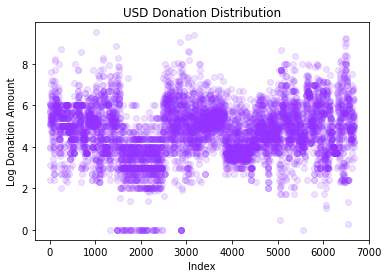

In [49]:
plt.scatter(range(1, 6681), np.log10(donation_rels[donation_rels['currency'] == 'usd']['amount'] + 1), alpha = 0.15, c = '#9433ff')
plt.title('USD Donation Distribution')
plt.xlabel('Index')
plt.ylabel('Log Donation Amount')
# plt.savefig(os.getcwd() + '/Graphs/relationshipGraphs/usdDonationDistroLogScatter')
plt.show()
plt.close()

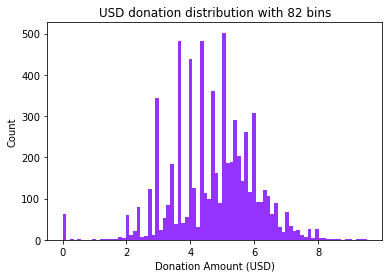

In [50]:
n_bins = int(np.around(np.sqrt(6680)))
plt.hist(np.log10(donation_rels[donation_rels['currency'] == 'usd']['amount'] + 1), bins = n_bins, color = '#9433ff')
plt.title('USD donation distribution with {} bins'.format(str(n_bins)))
# tick_locs = plt.xticks()[0]
# plt.xticks(tick_locs, ['', '0', '$10^2$', '$10^4$', '$10^6$', '$10^8$'])
plt.xlabel('Donation Amount (USD)')
plt.ylabel('Count')
# plt.savefig(os.getcwd() + '/Graphs/relationshipGraphs/usdDonationDistroLogHistoTicks')
plt.show()
plt.close()

Looking into relationships of type **education**:

In [51]:
education_rels = base_rels[base_rels['category_id'] == 2]
education_rels.shape

(27124, 15)

In [52]:
education_rels.head()

,category_id,description2,id,description,entity1_id,is_current,updated_at,entity2_id,currency,start_date,amount,goods,description1,end_date,filings
26197,2,None,26197,Roel C Campos is/was a student of Harvard La...,14659,None,2008-11-07T14:43:40Z,14713,None,None,NaN,None,None,1979-00-00,NaN
29744,2,Master of Science,29744,Warren Buffett is a student of Columbia Univ...,14923,True,2008-11-09T18:30:10Z,14924,None,None,NaN,None,Master of Science,None,NaN
29746,2,Bachelor of Arts / Science,29746,Jim C Walton is a student of University of A...,1020,True,2008-11-09T18:30:13Z,14926,None,None,NaN,None,Bachelor of Arts / Science,None,NaN
29747,2,Bachelor of Arts / Science,29747,Rob Walton is a student of University of Ark...,1029,True,2008-12-21T10:32:41Z,14926,None,None,NaN,None,Bachelor of Arts / Science,None,NaN
29748,2,Doctor of Jurisprudence,29748,Rob Walton is a student of Columbia University,1029,True,2008-12-21T10:32:41Z,14924,None,None,NaN,None,Doctor of Jurisprudence,None,NaN


In [53]:
print(education_rels['description1'].value_counts().sum())  # 1,364 values are None
education_rels['description1'].value_counts()

25760


Undergraduate                                             13240
Graduate                                                  11364
High School                                                 800
Bachelor of Arts / Science                                  172
Master of Business Administration                            35
                                                          ...  
MBA, Marketing, Finance, General Management                   1
Global Business                                               1
Non-Profit Executive Leadership Program                       1
M.S. in Software Development and Management                   1
F.B.I. Academy’s Law Specialist School in Quantico, Va        1
Name: description1, Length: 80, dtype: int64

In [54]:
print(education_rels['description2'].value_counts().sum())  # 8,835 values are None
education_rels['description2'].value_counts()

18289


Undergraduate                               9380
Graduate                                    8062
High School                                  589
Bachelor of Arts / Science                   175
Master of Business Administration             35
Drop Out                                      12
Doctor of Jurisprudence                        9
Doctorate                                      9
Master of Science                              4
Medical Doctor                                 3
BS, economics                                  1
J.D. - 1991                                    1
1958 graduate                                  1
alumni                                         1
Biological Engineering                         1
Bachelors of Political Science/Sociology       1
Juris Doctorate                                1
LLB                                            1
Ph.D. in English and American literature       1
B.S. Accounting                                1
Bachelors           

In [55]:
# education_rels[~(education_rels['description1'].isna()) & ~(education_rels['description2'].isna())]  # rows where description1 and description2 exist
education_desc = education_rels[(education_rels['description1'].notna()) & (education_rels['description2'].notna())]  # rows where description1 and description2 exist
education_desc.shape

(18279, 15)

In [56]:
np.count_nonzero(np.where(education_desc['description1'] != education_desc['description2'], True, False))

5

In [57]:
for i in np.where(education_desc['description1'] != education_desc['description2']):
    print(education_desc.iloc[i, 3], education_desc.iloc[i, 12], education_desc.iloc[i, 1])

29891      Steven Spielberg  is a student of  Cal State L...
29932      Leonore Annenberg  is/was a student of  Stanfo...
30195      Doris Fisher  is a student of  Stanford Univer...
1487720    Leonard Blavatnik  is/was a student of  Lomono...
1672685    Dr. Shiva Ayyadurai  is/was a student of  Mass...
Name: description, dtype: object 29891      Undergraduate
29932      Undergraduate
30195      Undergraduate
1487720    Undergraduate
1672685              PhD
Name: description1, dtype: object 29891                        Drop Out
29932      Bachelor of Arts / Science
30195      Bachelor of Arts / Science
1487720    Bachelor of Arts / Science
1672685        Biological Engineering
Name: description2, dtype: object


In [58]:
education_rels[(education_rels['description1'].notna()) & (education_rels['description2'].isna())].shape

(7481, 15)

In [59]:
education_rels[(education_rels['description1'].isna()) & (education_rels['description2'].notna())].shape

(10, 15)

Next part of code is for the 2nd step of BFS, and has been commented out for now as discussed

In [60]:
# nodes = pd.unique(pd.concat([base_rels['entity1_id'], base_rels['entity2_id']], ignore_index = True))  # list of unique entites from base rels
# len(nodes)

In [61]:
# bfs_2step = rels[rels['entity1_id'].isin(nodes) | rels['entity2_id'].isin(nodes)]
# bfs_2step.shape

In [62]:
# bfs_2step.head()

In [63]:
# G = nx.from_pandas_edgelist(bfs_2step, 'entity1_id', 'entity2_id', ['category_id', 'description', 'updated_at'])

In [64]:
# G[1006]